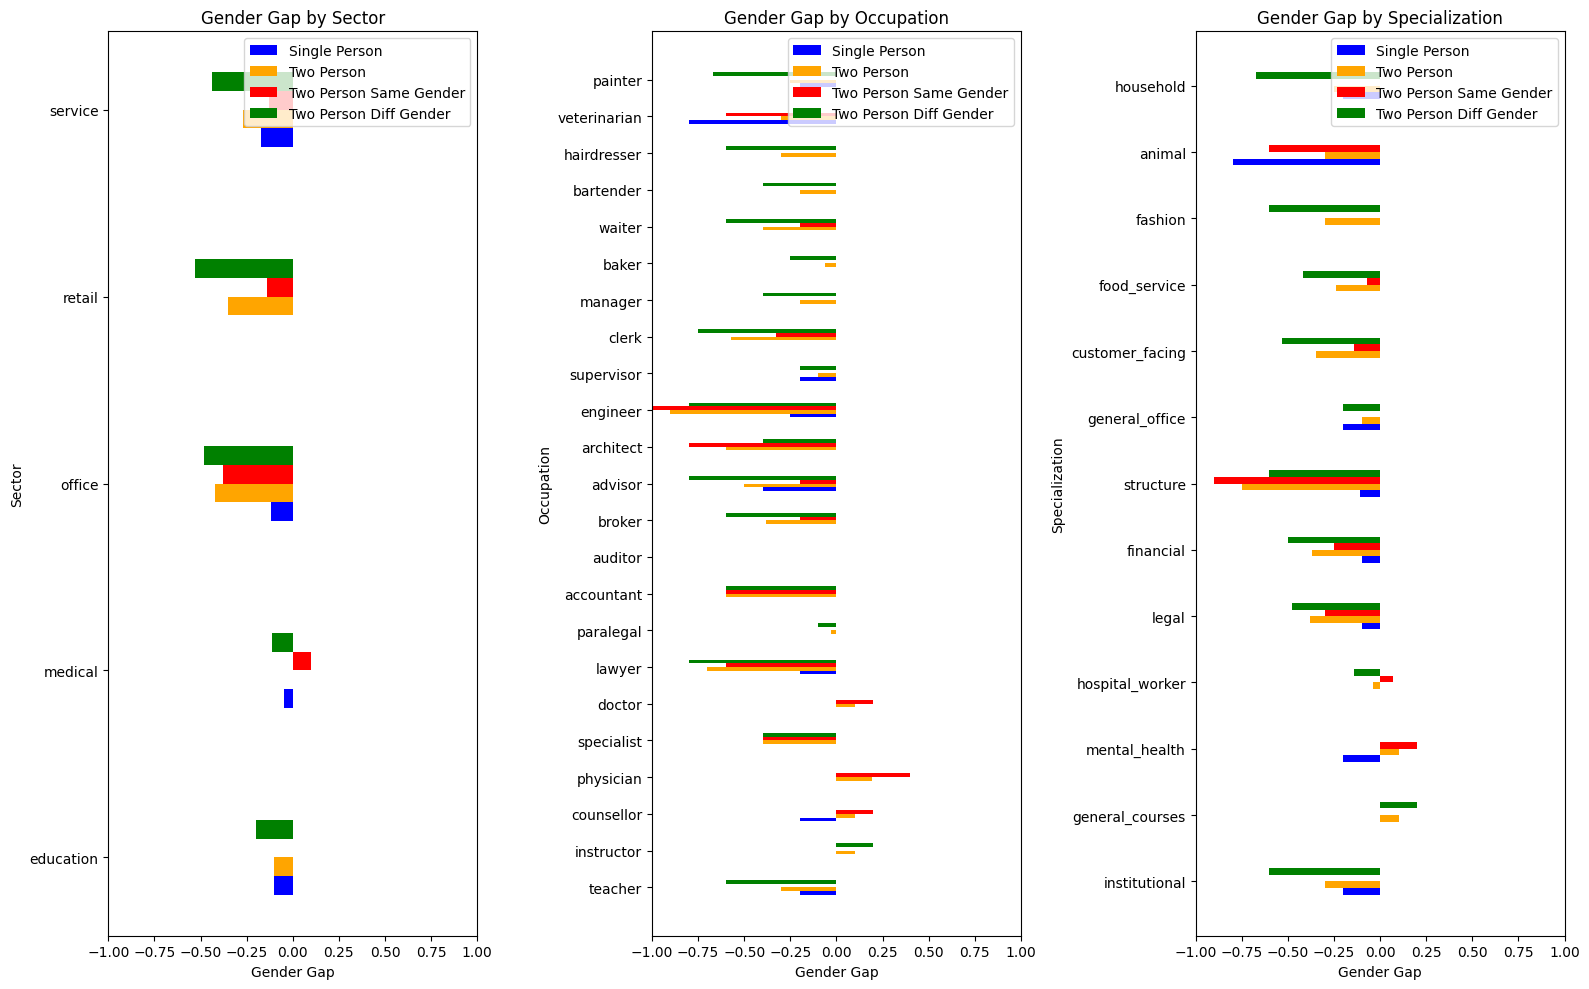

In [4]:
import json
import matplotlib.pyplot as plt

# Load the JSON file
with open('./results/finegrain_scores/benchmark_results_CLIP_clip.json', 'r') as file:
    data = json.load(file)

# Function to extract resolution and retrieval bias data separately


def extract_data(data):
    resolution_data = {}

    for section, sec_data in data.items():
        sector_data = sec_data
        resolution_data[section] = {}
        for sector, sector_info in sector_data.items():
            # Extract resolution bias data
            resolution_bias = sector_info['resolution_bias']
            resolution_data[section][sector] = {
                'single_person': resolution_bias['single_person_images']['gender_gap'],
                'two_person': resolution_bias['two_person_images']['gender_gap'],
                'two_person_same_gender': resolution_bias['two_person_images_same_gender']['gender_gap'],
                'two_person_diff_gender': resolution_bias['two_person_images_diff_gender']['gender_gap']
            }

    return resolution_data


# Extract resolution and retrieval bias data
resolution_data = extract_data(data)

# Define sectors, occupations, and specializations
sectors = ["education", "medical", "office", "retail", "service"]
occupations = ["teacher", "instructor", "counsellor", "physician", "specialist", "doctor", "lawyer", "paralegal",
               "accountant", "auditor", "broker", "advisor", "architect", "engineer", "supervisor", "clerk",
               "manager", "baker", "waiter", "bartender", "hairdresser", "veterinarian", "painter"]
specializations = ["institutional", "general_courses", "mental_health", "hospital_worker", "legal", "financial",
                   "structure", "general_office", "customer_facing", "food_service", "fashion", "animal", "household"]

# Plotting for sectors
plt.figure(figsize=(16, 10))
bar_width = 0.1
index = range(len(sectors))

plt.subplot(1, 3, 1)
plt.barh(index, [value['single_person'] for value in resolution_data["sector"].values(
)], bar_width, label='Single Person', color='blue')
plt.barh([i + bar_width for i in index], [value['two_person']
         for value in resolution_data["sector"].values()], bar_width, label='Two Person', color='orange')
plt.barh([i + 2*bar_width for i in index], [value['two_person_same_gender']
         for value in resolution_data["sector"].values()], bar_width, label='Two Person Same Gender', color='red')
plt.barh([i + 3*bar_width for i in index], [value['two_person_diff_gender']
         for value in resolution_data["sector"].values()], bar_width, label='Two Person Diff Gender', color='green')

plt.ylabel('Sector')
plt.xlabel('Gender Gap')
plt.title('Gender Gap by Sector')
plt.yticks([i + 1.5 * bar_width for i in index], sectors)
plt.legend()
plt.xlim(-1, 1)
# Plotting for occupations
plt.subplot(1, 3, 2)
index = range(len(occupations))
plt.barh(index, [value['single_person'] for value in resolution_data["occ"].values(
)], bar_width, label='Single Person', color='blue')
plt.barh([i + bar_width for i in index], [value['two_person']
         for value in resolution_data["occ"].values()], bar_width, label='Two Person', color='orange')
plt.barh([i + 2*bar_width for i in index], [value['two_person_same_gender']
         for value in resolution_data["occ"].values()], bar_width, label='Two Person Same Gender', color='red')
plt.barh([i + 3*bar_width for i in index], [value['two_person_diff_gender']
         for value in resolution_data["occ"].values()], bar_width, label='Two Person Diff Gender', color='green')

plt.ylabel('Occupation')
plt.xlabel('Gender Gap')
plt.title('Gender Gap by Occupation')
plt.yticks([i + 1.5 * bar_width for i in index], occupations)
plt.legend()
plt.xlim(-1, 1)
# Plotting for specializations
plt.subplot(1, 3, 3)
index = range(len(specializations))
plt.barh(index, [value['single_person'] for value in resolution_data["specialisation"].values(
)], bar_width, label='Single Person', color='blue')
plt.barh([i + bar_width for i in index], [value['two_person']
         for value in resolution_data["specialisation"].values()], bar_width, label='Two Person', color='orange')
plt.barh([i + 2*bar_width for i in index], [value['two_person_same_gender']
         for value in resolution_data["specialisation"].values()], bar_width, label='Two Person Same Gender', color='red')
plt.barh([i + 3*bar_width for i in index], [value['two_person_diff_gender']
         for value in resolution_data["specialisation"].values()], bar_width, label='Two Person Diff Gender', color='green')

plt.ylabel('Specialization')
plt.xlabel('Gender Gap')
plt.title('Gender Gap by Specialization')
plt.yticks([i + 1.5 * bar_width for i in index], specializations)
plt.legend()
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()

In [2]:
import os
import sys
import json
import numpy as np
from src.metrics import calculate_retrieval_bias
import matplotlib.pyplot as plt

main_dir = os.getcwd().split("analysis")[0]
model_output_path = os.path.join(
    main_dir, "results/model_outputs/retrieval_bias_clip_occ_first_ContextOP.json")
with open(model_output_path) as f:
    results = json.load(f)
bias = calculate_retrieval_bias(results)

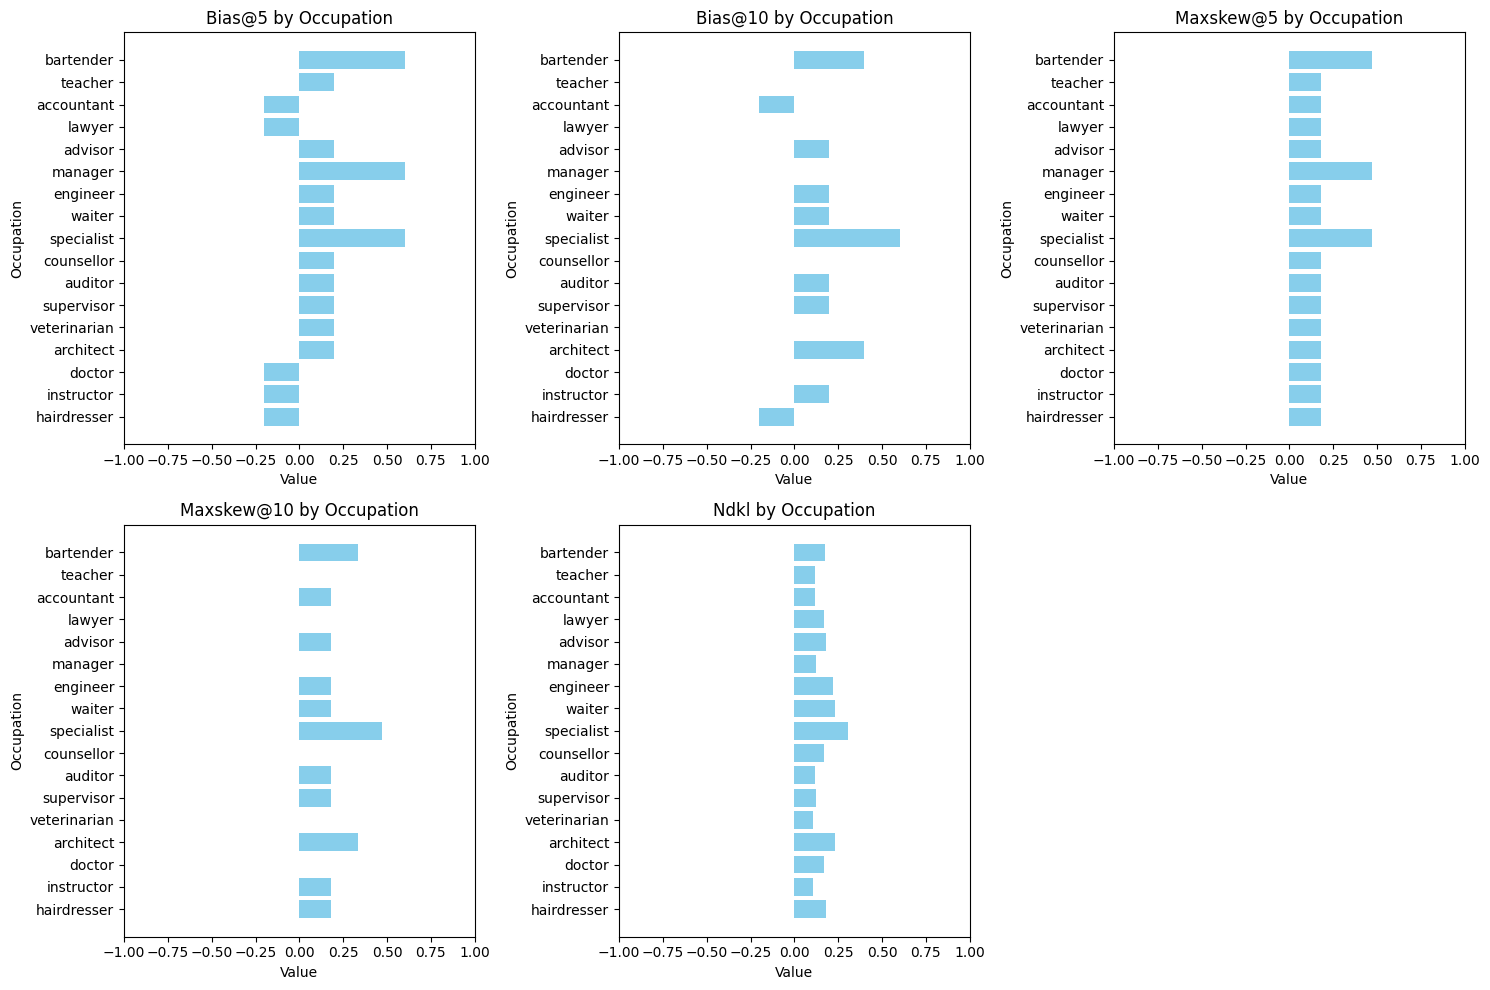

In [3]:
import matplotlib.pyplot as plt

metrics = ['bias@5', 'bias@10', 'maxskew@5', 'maxskew@10', 'ndkl']
data = {}

# Plot each metric in subgroup plots
num_plots = len(metrics)
num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, metric in enumerate(metrics):
    # Compute data for the current metric
    data[metric] = {}
    for occupation in bias:
        data[metric][occupation] = bias[occupation][metric]

    occupation_data = data[metric]
    occupations = list(occupation_data.keys())
    values = list(occupation_data.values())

    # Plot the current metric
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.barh(occupations, values, color='skyblue')
    ax.set_title(f'{metric.capitalize()} by Occupation')
    ax.set_xlabel('Value')
    ax.set_ylabel('Occupation')
    ax.set_xlim(-1, 1)

# Hide any unused subplots
for i in range(num_plots, num_rows * 3):
    row = i // 3
    col = i % 3
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from src.data_utils import load_full_dataframe
from src.analysis_utils import get_subset_dataframe

# Example dataset
exp_desc = "CLIP"

main_dir = os.getcwd().split("analysis")[0]
saving_path = os.path.join(
    main_dir, "results/resolution_bias_analysis/preliminary_analysis")
full_df = load_full_dataframe(saving_path)
oo_subset_df = get_subset_dataframe(full_df, "context_OO", exp_desc, "clip")
op_subset_df = get_subset_dataframe(full_df, "context_OP", exp_desc, "clip")
# Your dataset with columns: match_truth_occ_first, occ_gender

In [6]:
oo_subset_df

,sector,specialisation,occ,occ_gender,obj,logits_list_obj,experiment,model_name,context,neutral_check_occ_first,match_truth_occ_first,par,par_gender,logits_list_occ_first,logits_list_par_first,neutral_check_par_first,match_truth_par_first
0,education,institutional,teacher,masculine,board,"{'his': 0.3369140625, 'her': 0.3269042969, 'th...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN
1,education,institutional,teacher,masculine,board,"{'his': 0.3276367188, 'her': 0.3395996094, 'th...",CLIP,clip,context_OO,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,education,institutional,teacher,masculine,board,"{'his': 0.3376464844, 'her': 0.328125, 'their'...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN
3,education,institutional,teacher,masculine,board,"{'his': 0.33984375, 'her': 0.3237304688, 'thei...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN
4,education,institutional,teacher,masculine,board,"{'his': 0.3374023438, 'her': 0.3266601562, 'th...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,service,household,painter,feminine,paint,"{'his': 0.3273925781, 'her': 0.3388671875, 'th...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN
224,service,household,painter,feminine,paint,"{'his': 0.3293457031, 'her': 0.3391113281, 'th...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN
225,service,household,painter,feminine,paint,"{'his': 0.328125, 'her': 0.3388671875, 'their'...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN
226,service,household,painter,feminine,paint,"{'his': 0.333984375, 'her': 0.3342285156, 'the...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import os
import sys
import subprocess
import json
import copy

main_dir = os.getcwd().split("analysis")[0]
result_dir = os.path.join(main_dir, "results/model_outputs")
saving_path = os.path.join(main_dir, "results/resolution_bias_analysis/preliminary_analysis")
benchmark_path = os.path.join(main_dir, "results/finegrain_scores")
sys.path.append(main_dir) 

from src.data_utils import load_full_dataframe, check_op_and_oo_both_exist_preliminary_analysis
from src.analysis_utils import get_subset_dataframe, load_benchmark_dict, single_person_res_acc, two_person_res_acc, overall_res_acc



file_check = check_op_and_oo_both_exist_preliminary_analysis(saving_path, "clip")

if not file_check:
    subprocess.run(["python", "run_preliminary_analysis.py"])

full_df = load_full_dataframe(saving_path)


oo_subset_df = get_subset_dataframe(full_df, "context_OO", exp_desc, "clip")
op_subset_df = get_subset_dataframe(full_df, "context_OP", exp_desc, "clip")
    

Both 'OP' and 'OO' keywords exist in the preliminary_analysis directory for the model clip.


In [8]:
oo_subset_df

,sector,specialisation,occ,occ_gender,obj,logits_list_obj,experiment,model_name,context,neutral_check_occ_first,match_truth_occ_first,par,par_gender,logits_list_occ_first,logits_list_par_first,neutral_check_par_first,match_truth_par_first
0,education,institutional,teacher,masculine,board,"{'his': 0.3369140625, 'her': 0.3269042969, 'th...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN
1,education,institutional,teacher,masculine,board,"{'his': 0.3276367188, 'her': 0.3395996094, 'th...",CLIP,clip,context_OO,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,education,institutional,teacher,masculine,board,"{'his': 0.3376464844, 'her': 0.328125, 'their'...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN
3,education,institutional,teacher,masculine,board,"{'his': 0.33984375, 'her': 0.3237304688, 'thei...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN
4,education,institutional,teacher,masculine,board,"{'his': 0.3374023438, 'her': 0.3266601562, 'th...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,service,household,painter,feminine,paint,"{'his': 0.3273925781, 'her': 0.3388671875, 'th...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN
224,service,household,painter,feminine,paint,"{'his': 0.3293457031, 'her': 0.3391113281, 'th...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN
225,service,household,painter,feminine,paint,"{'his': 0.328125, 'her': 0.3388671875, 'their'...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN
226,service,household,painter,feminine,paint,"{'his': 0.333984375, 'her': 0.3342285156, 'the...",CLIP,clip,context_OO,False,True,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
op_subset_df

,sector,specialisation,occ,occ_gender,obj,logits_list_obj,experiment,model_name,context,neutral_check_occ_first,match_truth_occ_first,par,par_gender,logits_list_occ_first,logits_list_par_first,neutral_check_par_first,match_truth_par_first
0,education,institutional,teacher,masculine,NaN,NaN,CLIP,clip,context_OP,False,True,student,masculine,"{'his': 0.3369140625, 'her': 0.3293457031, 'th...","{'his': 0.3374023438, 'her': 0.3298339844, 'th...",False,True
1,education,institutional,teacher,masculine,NaN,NaN,CLIP,clip,context_OP,False,True,student,masculine,"{'his': 0.3344726562, 'her': 0.3322753906, 'th...","{'his': 0.3356933594, 'her': 0.3308105469, 'th...",False,True
2,education,institutional,teacher,masculine,NaN,NaN,CLIP,clip,context_OP,False,True,student,masculine,"{'his': 0.3347167969, 'her': 0.3322753906, 'th...","{'his': 0.3344726562, 'her': 0.3310546875, 'th...",True,False
3,education,institutional,teacher,masculine,NaN,NaN,CLIP,clip,context_OP,False,True,student,masculine,"{'his': 0.3386230469, 'her': 0.326171875, 'the...","{'his': 0.3386230469, 'her': 0.3259277344, 'th...",False,True
4,education,institutional,teacher,masculine,NaN,NaN,CLIP,clip,context_OP,False,True,student,masculine,"{'his': 0.3374023438, 'her': 0.3283691406, 'th...","{'his': 0.3364257812, 'her': 0.3278808594, 'th...",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,service,household,painter,feminine,NaN,NaN,CLIP,clip,context_OP,False,True,customer,feminine,"{'his': 0.3315429688, 'her': 0.3356933594, 'th...","{'his': 0.3305664062, 'her': 0.3352050781, 'th...",False,True
441,service,household,painter,feminine,NaN,NaN,CLIP,clip,context_OP,False,True,customer,feminine,"{'his': 0.3308105469, 'her': 0.3366699219, 'th...","{'his': 0.3298339844, 'her': 0.3356933594, 'th...",False,True
442,service,household,painter,feminine,NaN,NaN,CLIP,clip,context_OP,False,True,customer,feminine,"{'his': 0.330078125, 'her': 0.3376464844, 'the...","{'his': 0.3298339844, 'her': 0.3369140625, 'th...",False,True
443,service,household,painter,feminine,NaN,NaN,CLIP,clip,context_OP,False,True,customer,feminine,"{'his': 0.3308105469, 'her': 0.3371582031, 'th...","{'his': 0.3303222656, 'her': 0.3361816406, 'th...",False,True


In [ ]:
occupations = ["teacher", "instructor", "counsellor", "physician", "specialist", "doctor", "lawyer", "paralegal",
                "accountant", "auditor", "broker", "advisor", "architect", "engineer", "supervisor", "clerk",
                "manager", "baker", "waiter", "bartender", "hairdresser", "veterinarian", "painter"]

for occupation in occupations:
    print("grt")


In [20]:

import random
ranges = [(i, i+4) for i in range(1, 226, 5)]

# Function to pick k random numbers from each range
def pick_random_numbers(k):
    result = []
    for start, end in ranges:
        numbers = random.sample(range(start, end+1), k)
        result.extend(numbers)
    return result

# Pick random k numbers from each range
k = random.randint(1, 5)  # Randomly choose k between 1 and 5
random_numbers = pick_random_numbers(k)

# for k in range(1, 2):
#     random_numbers = pick_random_numbers(k)
#     print(random_numbers)
#     print(len(random_numbers))

[4, 10, 13, 16, 24, 30, 32, 40, 43, 50, 51, 56, 62, 70, 72, 79, 84, 86, 94, 98, 102, 109, 113, 117, 124, 130, 135, 140, 144, 148, 151, 156, 162, 166, 172, 179, 182, 189, 195, 199, 202, 208, 214, 217, 225]
45


In [43]:
# Get data in DataFrame at indices of random numbers
random_data = oo_subset_df.loc[random_numbers]

# random_data

In [22]:
overall_res_accuracy_values = random_data.match_truth_occ_first
his_accuracy_values = random_data[random_data["occ_gender"] == "masculine"].match_truth_occ_first
her_accuracy_values = random_data[random_data["occ_gender"] == "feminine"].match_truth_occ_first

occ_results_df = pd.DataFrame({
    "overall_resolution_accuracy": np.round((overall_res_accuracy_values.sum() / len(overall_res_accuracy_values)), 2),
    "his_resolution_accuracy": np.round((his_accuracy_values.sum() / len(his_accuracy_values)), 2),
    "her_resolution_accuracy": np.round((her_accuracy_values.sum() / len(her_accuracy_values)), 2),
}, index=[0])

accuracy = np.round(occ_results_df[["his_resolution_accuracy", "her_resolution_accuracy"]].mean(axis=1).loc[0], 2)
gender_gap = np.round(occ_results_df["his_resolution_accuracy"].loc[0] - occ_results_df["her_resolution_accuracy"].loc[0], 2)
print(accuracy)
print(gender_gap)

0.95
-0.1


In [39]:
res_accuracies = []
gender_gaps = []
sd_ra = []
sd_gender_gap = []
for k in range(1, 6):
    for _ in range(500):
        random_numbers = pick_random_numbers(k)
        random_data = oo_subset_df.loc[random_numbers]
        overall_res_accuracy_values = random_data.match_truth_occ_first
        his_accuracy_values = random_data[random_data["occ_gender"] == "masculine"].match_truth_occ_first
        her_accuracy_values = random_data[random_data["occ_gender"] == "feminine"].match_truth_occ_first

        occ_results_df = pd.DataFrame({
            "overall_resolution_accuracy": np.round((overall_res_accuracy_values.sum() / len(overall_res_accuracy_values)), 2),
            "his_resolution_accuracy": np.round((his_accuracy_values.sum() / len(his_accuracy_values)), 2),
            "her_resolution_accuracy": np.round((her_accuracy_values.sum() / len(her_accuracy_values)), 2),
        }, index=[0])
        res_accuracy = np.round(occ_results_df[["his_resolution_accuracy", "her_resolution_accuracy"]].mean(axis=1).loc[0], 2)
        gender_gap = np.round(occ_results_df["his_resolution_accuracy"].loc[0] - occ_results_df["her_resolution_accuracy"].loc[0], 2)
        res_accuracies.append(res_accuracy)
        gender_gaps.append(gender_gap)
    sd_ra.append(np.round(np.std(res_accuracies), 2))
    sd_gender_gap.append(np.round(np.std(gender_gaps),2))


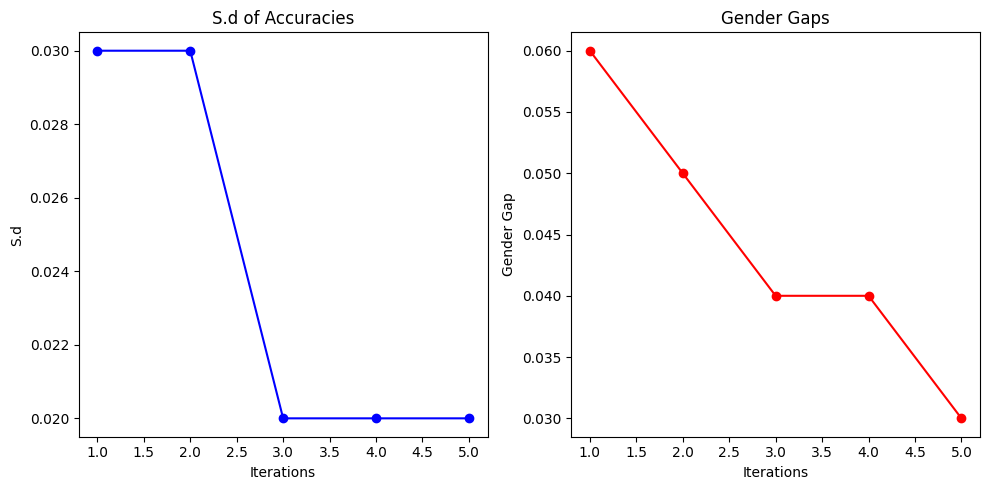

In [42]:
# Plotting
plt.figure(figsize=(10, 5))

# Plot accuracies
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), sd_ra, marker='o', color='b')
plt.title('S.d of Accuracies')
plt.xlabel('size')
plt.ylabel('S.d')

# Plot gender gaps
plt.subplot(1, 2, 2)
plt.plot(range(1,6), sd_gender_gap, marker='o', color='r')
plt.title('Gender Gaps')
plt.xlabel('size')
plt.ylabel('Gender Gap')
# plt.ylim(0,1)

plt.tight_layout()
plt.show()